In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from typing import Dict, Tuple, Set, Callable


def grouper(input: Dict[Tuple[str, ...],pd.DataFrame],
            keys: Tuple[str, ...]) -> Dict[Tuple[str, ...], pd.DataFrame]:
    """
    Helper function for recursive grouping dict of pandas DataFrames.
    """
    if not keys:
        return input

    to_tuple_transformer: Callable = lambda element: element if isinstance(element, tuple) else (element, )

    grouped_df: Dict[Tuple[str, ...], pd.DataFrame] = {
        (next_key, *to_tuple_transformer(curr_key)): next_df
        for curr_key, curr_df in input.items()
        for next_key, next_df in curr_df.groupby(keys[-1])
    }

    return grouper(grouped_df, keys[:-1])


def group(input: pd.DataFrame,
          keys: Tuple[str, ...] = ("engine_family", "flight_phase")) -> Dict[Tuple[str, ...], pd.DataFrame]:
    """
    Mock function for maintenance characteristics prediction.
    :param input: input DataFrame of aircraft and engine characteristics.
    :param keys: keys that are used for grouping output data.
    :return: output groups of DataFrames of predicted maintenance characteristics.
    """
    phase_df: Dict = {k: v for k, v in input.groupby(keys[-1])}

    return grouper(phase_df, keys[:-1])

In [ ]:
X = pd.read_csv('drive/MyDrive/Colab Notebooks/mm/r&d/X.csv')
y = pd.read_csv('drive/MyDrive/Colab Notebooks/mm/r&d/y.csv')

In [ ]:
splitted_datasets = group(X, ("flight_phase", "engine_family"))

In [ ]:
def validate(df):
    return df.dropna(axis='columns', thresh=20).dropna()

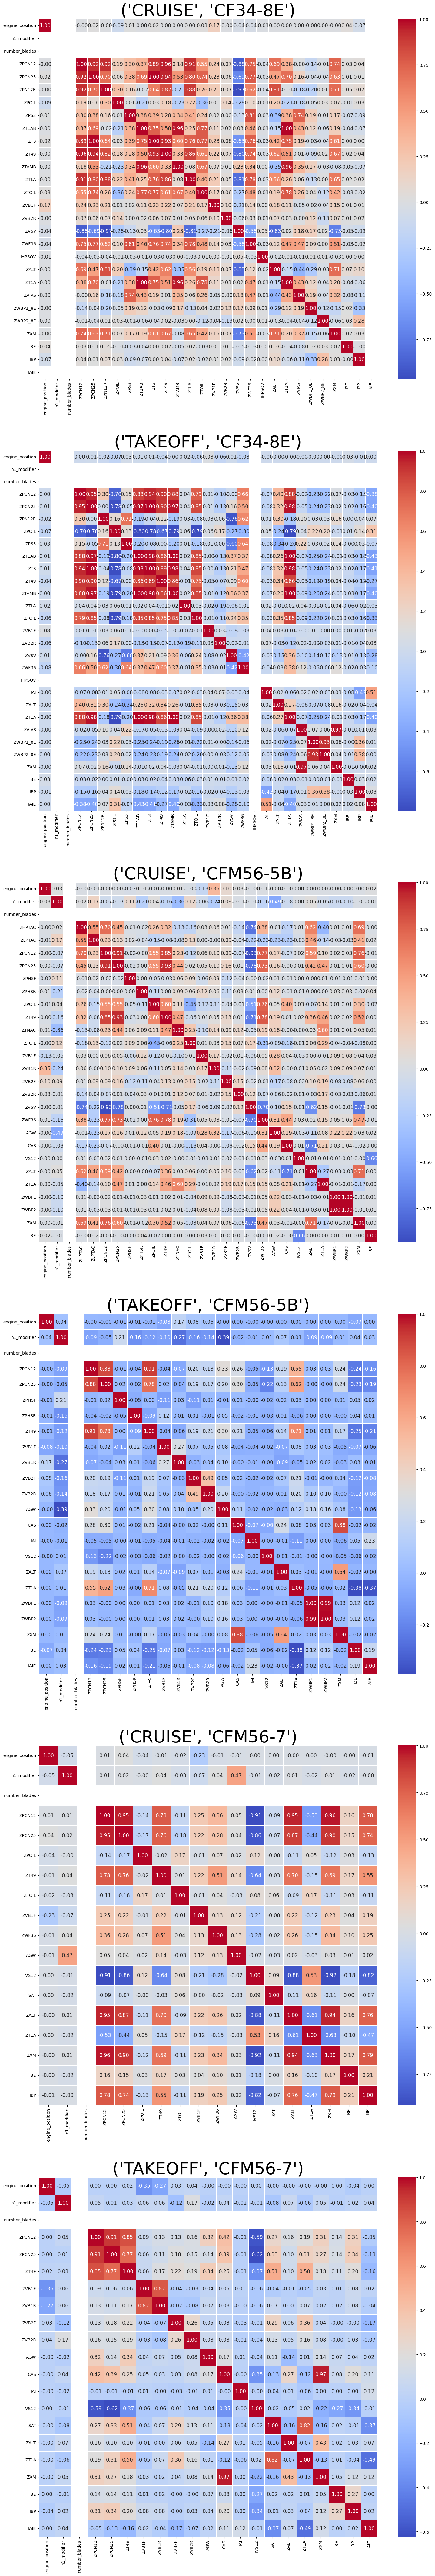

In [ ]:
f, ax = plt.subplots(len(splitted_datasets.keys()), 1, figsize=(18, 108))

for i, (key, df) in enumerate(splitted_datasets.items()):
    val_df = validate(df)
    sns.heatmap(val_df.corr(), annot=True, annot_kws={'size': 12}, linewidths=.5, fmt= '.2f', cmap="coolwarm", ax=ax[i])
    ax[i].set_title(str(key), fontsize=40)
plt.show()

В таблице некоторые параметры (например number_blades) имеют белые строки, потому что значения этих парметров для данного случая ВСЕГДА равны одному значению, а значит дисперсия 0, а в формуле корреляции происходит деление на корень из произведения дисперсий, т.е. на ноль, отсюда и неправильная отрисовка.

In [ ]:
splitted_datasets[("TAKEOFF", "CFM56-7")]["number_blades"].unique()

array([24.])

# Формулы и описания


Связь параметров с корреляцией > 0.85 (6 таблица)

# ZXM(Mach) and CAS(computed air speed)

ZXM = CAS / (661.5 x sqrt(T/T0))

Where CAS is the computed air speed in knots, T is the static air temperature in kelvin, and T0 is the standard temperature at sea level (288.15 K). The value of 661.5 is a constant used to convert knots to feet per second and to adjust for the compressibility of air at high speeds.


# ZPCN12 - N1 INDICATED (%RPM) and ZPCN25 - N2 (HIGH SPEED ROTOR) (%RPM)

There is no single formula for converting N1 indicated (%RPM) to N2 (%RPM) as it depends on the specific engine and its design. However, in general, N1 is the rotational speed of the low-pressure compressor (LPC) and N2 is the rotational speed of the high-pressure compressor (HPC). The relationship between the two speeds can be affected by factors such as engine pressure ratio, bypass ratio, and turbine efficiency. Therefore, a conversion factor or equation would need to be provided by the engine manufacturer or specific aircraft manual.


# ZPCN12 - N1 INDICATED (%RPM) and ZT49 - EGT-HPT DISCHRG TOT TMP(DEG)

There is no direct formula between EGT-HPT DISCHRG TOT TMP and N1 INDICATED (%RPM) as they are two different parameters that measure different aspects of the engine performance. EGT-HPT DISCHRG TOT TMP refers to the temperature of the exhaust gases after passing through the high-pressure turbine, while N1 INDICATED (%RPM) refers to the rotational speed of the low-pressure compressor.

However, both parameters can be used together to monitor the engine performance and diagnose any issues. For example, a high EGT-HPT DISCHRG TOT TMP may indicate a problem with the high-pressure turbine, which can affect the N1 INDICATED (%RPM) reading. In such cases, a detailed analysis of the engine data and diagnostic tests may be required to determine the root cause of the problem and take corrective actions.

**5 таблица**

# ZT49 - EGT-HPT DISCHRG TOT TMP and ZALT - PRESSURE ALTITUDE (FEET)

There is no direct formula between EGT-HPT DISCHRG TOT TMP and PRESSURE ALTITUDE (FEET) as they are two different parameters that measure different aspects of the engine performance. EGT-HPT DISCHRG TOT TMP refers to the temperature of the exhaust gases after passing through the high-pressure turbine, while PRESSURE ALTITUDE (FEET) refers to the altitude above sea level as calculated from the atmospheric pressure.

However, both parameters can be used together to monitor the engine performance and diagnose any issues. For example, a high EGT-HPT DISCHRG TOT TMP at a certain pressure altitude may indicate a problem with the engine's performance at that altitude. In such cases, a detailed analysis of the engine data and diagnostic tests may be required to determine the root cause of the problem and take corrective actions.